# EDOs de ordem superior (redução de ordem) 

EDOs de ordem superior podem ser reescritas como sistemas de EDOs de primeira ordem. A fim de verificarmos como isto pode ser feito, consideremos, inicialmente o caso geral de uma EDO de segunda ordem. 

$$\begin{cases}
y''(t) = f(t,y,y') \\
y(t_0) = y_0 \\ 
y'(t_0) = y_0'
\end{cases}$$

Se fizermos $y_1(t) = y(t)$ e $y_2(t) = y'(t)$, o PVI acima pode ser reformulado como um sistema de duas EDOs de primeira ordem como: 

$$\begin{cases}
y_1'(t) = y_2(t) \\
y_2'(t) = f(t,y_1,y_2) \\
y_1(t_0) = y_0 \\
y_2(t_0) = y_0'
\end{cases}$$

## Movimento pendular simples

Como exemplo (simplificado) prático derivado de uma EDO de segunda ordem, temos o movimento de um pêndulo submetido apenas à força gravitacional como mostra a figura abaixo. O pêndulo de massa $m$ fica pendurado por uma corda de comprimento $l$ e se move em relação ao eixo $\theta = 0$. O movimento é completamente descrito com a especificação da posição inicial $\theta(0) = \theta_0$ e a velocidade angular inicial $\theta'(0) = \theta_0'$.

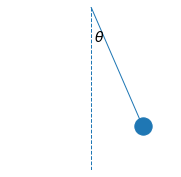

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

#plt.autoscale(enable=True, axis='x', tight=True)
plt.figure(figsize=(3,3))

theta = np.pi/10
x = np.linspace(0,1,10)
plt.axvline(x=0.5,ymin=0,ymax=1.0,linestyle='--',linewidth=1.0)
plt.plot([0.5,0.5 + np.sin(theta)],[1.0,1.0-np.cos(theta)],linewidth=1.0)
plt.scatter([0.5 + np.sin(theta)],[1.0-np.cos(theta)],s=300)
plt.box(False); locs, labels = plt.xticks(); plt.tick_params(axis='both',width=0.0,labelleft=False,labelbottom=False)
x1,x2 = plt.xlim([0,1])
y1,y2 = plt.ylim([-0.3,1])

plt.annotate('$\\theta$',xy=(0.52,0.72),fontsize=14);

Uma vez que o comprimento do arco realizado pelo pêndulo é $s = l\theta$ e a força-peso tangente ao arco oposta ao movimento é determinada em função de $\theta$ por $-mg{\rm sen}(\theta)$, a segunda lei de Newton diz-nos que 

$$m\dfrac{d^2s}{dt^2} = -mg{\rm sen}(\theta) \Rightarrow \dfrac{d^2 \theta}{dt^2} + \dfrac{g}{l}{\rm sen}(\theta) = 0$$

Tomando a EDO acima juntamente com as condições iniciais e valendo-se das substituições $y_1(t) = \theta(t)$ e $y_2(t) = \theta'(t)$, obtemos um sistema de EDOs de primeira ordem que nos conduz ao seguinte PVI:
$$\begin{cases}
y_1'(t) = y_2(t) \\
y_2'(t) = - \dfrac{g}{l}{\rm sen}(\theta) \\
y_1(0) = \theta(0) = \theta_0 \\
y_2(0) = \theta'(0) = \theta_0'
\end{cases}$$

## Hipótese de ângulos pequenos 

No movimento pendular, se $\theta$ for considerado muito pequeno, podemos dizer que $\theta \approx {\rm sen}(\theta)$. Logo, a EDO de segunda ordem reduz-se a 

$$\dfrac{d^2 \theta}{dt^2} + \dfrac{g}{l}\theta = 0,$$

de maneira que, analogamente ao caso anterior, temos um novo sistema levemente modificado na segunda equação: 
$$\begin{cases}
y_1'(t) = y_2(t) \\
y_2'(t) = - \dfrac{g}{l}y_1(t) \\
y_1(0) = \theta(0) = \theta_0 \\
y_2(0) = \theta'(0) = \theta_0'
\end{cases}$$

Vale dizer que a solução analítica para este caso é dada por $\theta(t) = \theta_0 \cos \left( \sqrt{\dfrac{g}{l}} t \right)$.

## Caso geral de ordem $m$

De modo similar, uma EDO de ordem $m$ pode gerar um sistema de EDOs de ordem 1. Considerando o PVI generalizado 
$$\begin{cases}
\dfrac{d^m y(t)}{dt^m} = f(t,y,y',\ldots,y^{(m-1)}) \\
y(t_0) = y_0, \ \ y'(t_0) = y_0', \ldots y^{(m-1)}(t_0) = y_0^{(m-1)},
\end{cases}$$
usamos as substituições 

$$\begin{align}
y_1(t) &= y(t) \\
y_2(t) &= y'(t) \\
\vdots &\vdots  \vdots \\
y_m(t) &= y^{(m-1)}(t) \\
\end{align}$$

para reformular o PVI original no sistema:

$$\begin{cases}
y_1'(t) = y_2(t) \\
y_2'(t) = y_3(t) \\
\vdots \\
y_{m-1}'(t) = y_m(t) \\
y_m'(t) = f(t,y_1,\ldots,y_m) \\
y_1(t_0) = y_0 \\
y_2(t_0) = y_0'' \\
\vdots \\
y_m(t_0) = y_0^{(m-1)} \\
\end{cases}$$

**Exemplo:** O PVI 

$$\begin{cases}
y'''(t) + 3y''(t) + 3y'(t) + y(t) = -4{\rm sen}(t) \\
y(0) = y'(0) = 1, y''(0) = -1
\end{cases}$$
pode ser reformulado no sistema

$$\begin{cases}
y_1'(t) = y_2(t) \\
y_2'(t) = y_3(t) \\
y_3'(t) = - y_1(t) -3y_2(t) - 3y_3(t) -4{\rm sen}(t) \\
y_1(0) = 1 \\
y_2(0) = 1 \\
y_3(0) = -1.
\end{cases}$$

**Exercício resolvido:** utilizando os parâmetros $g=9.867 \, m/s^2$, $\theta_0 = \pi/25$ e $\theta_0' = 0.5 \, m/s$, resolva numericamente o sistema de EDOs do movimento pendular sob a hipótese de ângulos pequenos. 

Para resolver o exercício, utilizaremos o método de Euler que implementamos anteriormente. Basta definirmos uma nova função `fsys` e os parâmetros necessários para o funcionamento da função `euler_sys`.

In [2]:
from numpy import *

def euler_sys(t0,tf,y0,h,f):
    """
    Resolve o PVI de um sistema de EDOs escalares
    y’ = f(t,y), t0 <= t <= b, y(t0)=y0 pelo metodo de Euler com tamanho de passo h.
    O usuario deve fornecer um vetor f contendo as funcoes a serem avaliadas como 
    membro direito.
    
    Entrada: 
        t0  - tempo inicial
        tf  - tempo final 
        y0  - condicao inicial 
        h   - passo 
        f   - vetor de funcoes f(t,y) (anonima)
    
    Saída:
        t   - vetor contendo os valores nodais t[i], i = 1,2,...,n
        Y   - matriz de dimensoes n x m, com m sendo o numero de EDOs
             (a i-esima linha y[i,:] traz as estimativas de todas 
              as funcoes y_j no tempo t[i])
    """    
    
    m = y0.size
    n = round((tf - t0)/h + 1)
    t = linspace(t0,t0+(n-1)*h,n)
    Y = zeros((n,m))
    
    Y[0,:] = y0
    
    
    for i in range(1,n):  
        Y[i,:] = Y[i-1,:] + h*f(t[i-1],Y[i-1,:])     
        
    return t,Y


In [3]:
# define funcao f(t,y)

def params(g,l):
    return g,l

def fsys(t,y):
    
    aux = params(g,l) 
    # considera g e l como parâmetros
    F = array([y[1],-aux[0]/aux[1]*y[0]])
    
    return F


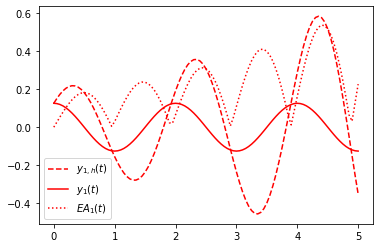

In [4]:
from matplotlib.pyplot import plot,legend


# parametros
t0,tf = 0,5
h = 0.05

theta0 = np.pi/25
dtheta0 = 0.5
y0 = array([theta0,dtheta0])
g, l = 9.867, 1.0

# solucao numerica do sistema
t,Y = euler_sys(t0,tf,y0,h,fsys)
y1_num = Y[:,0]
y2_num = Y[:,1]

# solucao analitica
y1_an = theta0*np.cos(np.sqrt(g/l)*t)

# plotagem
plot(t,y1_num,'r--',label='$y_{1,h}(t)$')
#plot(t,y2_num,'b--',label='$y_{2,h}(t)$')

plot(t,y1_an,'r',label='$y_1(t)$')
#plot(t,y2_an,'b',label='$y_2(t)$')

# erro absoluto
plot(t,abs(y1_an - y1_num),'r:',label='$EA_1(t)$')
#plot(t,abs(y2_an - y2_num),'b:',label='$EA_2(t)$')

legend(loc=3,fontsize=10)

**Exercício:** Converta as EDOs de ordem superior abaixo para sistemas de EDOs escalares.

1. 
$$\begin{cases}
y'''(t) + 4y''(t) + 5y'(t) + 2y(t) = 2t^2 + 10t + 8 \\
y(0) = 1, y'(0) = -1, y''(0) = 3
\end{cases}$$
Solução analítica: $y(t) = \exp(-t) + t^2$.

2. 
$$\begin{cases}
y''(t) + 4y'(t) + 13y(t) = 40\cos(t) \\
y(0) = 3, y'(0) = 4, y''(0) = 3
\end{cases}$$
Solução analítica: $y(t) = 3\cos(t) + {\rm sen}(t) + \exp(-2t){\rm sen}(3t)$.

## Problemas

**Problema:** Converta o seguinte sistema de EDOs de 2a. ordem para um sistema maior de EDOs de primeira ordem. Este sistema surge do estudo da atração gravitacional de uma massa por outra:

$$\begin{cases}
x''(t) = \dfrac{-cx(t)}{r(t)^3} \\
y''(t) = \dfrac{-cy(t)}{r(t)^3} \\
z''(t) = \dfrac{-cz(t)}{r(t)^3},
\end{cases}$$ 
onde $c$ é uma constante positiva e $r(t) = [x(t)^2 + y(t)^2 + z(t)^2]^{1/2}$, com $t$ denotando o tempo.

**Problema:** Resolva o problema do pêndulo numericamente pelo método de Euler. Considere $l = 1$ e $g = 32.2 \, pés/s^2$. Como valores iniciais, escolha $0 < \theta(0) \le \pi/2$ e $\theta'(0) = 1$. Experimente vários valores de $h$ de modo a obter erros pequenos. Plote os gráficos $t \, vs. \, \theta(t)$, $t \, vs. \theta'(t)$ e $\theta(t) \, vs. \theta'(t)$. O movimento parece periódico no tempo? (Use a hipótese de pequenos ângulos.)